#Konsultasi Pekerjaan

konsultasi pekerjaan kita buat lebih spesifikasi mengenai data science

Praprose Data

In [ ]:
#Operasi numerik
import numpy as np
#Digunakan untuk manipulasi dan analisis data, terutama untuk bekerja dengan data tabular
import pandas as pd


#Praproses Data

In [ ]:
#Load data
dt = pd.read_csv('jobs_in_data.csv')

# Melihat struktur data
dt.shape
dt.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
7,2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M
8,2023,Machine Learning Researcher,Machine Learning and AI,USD,138700,138700,United States,Mid-level,Full-time,In-person,United States,M
9,2023,Data Engineer,Data Engineering,USD,210000,210000,United States,Executive,Full-time,Remote,United States,M


In [ ]:
dt = pd.DataFrame(dt)
# Cek nilai yang hilang
print(dt.isnull().sum())

# Cek duplikasi
print(dt.duplicated().sum())

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64
4014


#Normalisasi Data

Konversi data kategor ke format numerik

In [ ]:
#normalisasi data
# konversi data ke format numerik
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()

for column in ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']:
    dt[column] = le.fit_transform(dt[column])

print(dt.head())

   work_year  job_title  job_category  salary_currency  salary  salary_in_usd  \
0       2023         42             4                5   88000          95012   
1       2023         41             3               10  186000         186000   
2       2023         41             3               10   81800          81800   
3       2023         69             7               10  212000         212000   
4       2023         69             7               10   93300          93300   

   employee_residence  experience_level  employment_type  work_setting  \
0                  29                 2                2             0   
1                  80                 3                2             1   
2                  80                 3                2             1   
3                  80                 3                2             1   
4                  80                 3                2             1   

   company_location  company_size  
0                23             

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()

for column in ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']:
    dt[column] = le.fit_transform(dt[column])

print(dt.head())


   work_year  job_title  job_category  salary_currency  salary  salary_in_usd  \
0       2023         42             4                5   88000          95012   
1       2023         41             3               10  186000         186000   
2       2023         41             3               10   81800          81800   
3       2023         69             7               10  212000         212000   
4       2023         69             7               10   93300          93300   

   employee_residence  experience_level  employment_type  work_setting  \
0                  29                 2                2             0   
1                  80                 3                2             1   
2                  80                 3                2             1   
3                  80                 3                2             1   
4                  80                 3                2             1   

   company_location  company_size  
0                23             

#Visualisasi Data

Visualisasi distribusi pekerjaan bedasarkan berbgai kategori

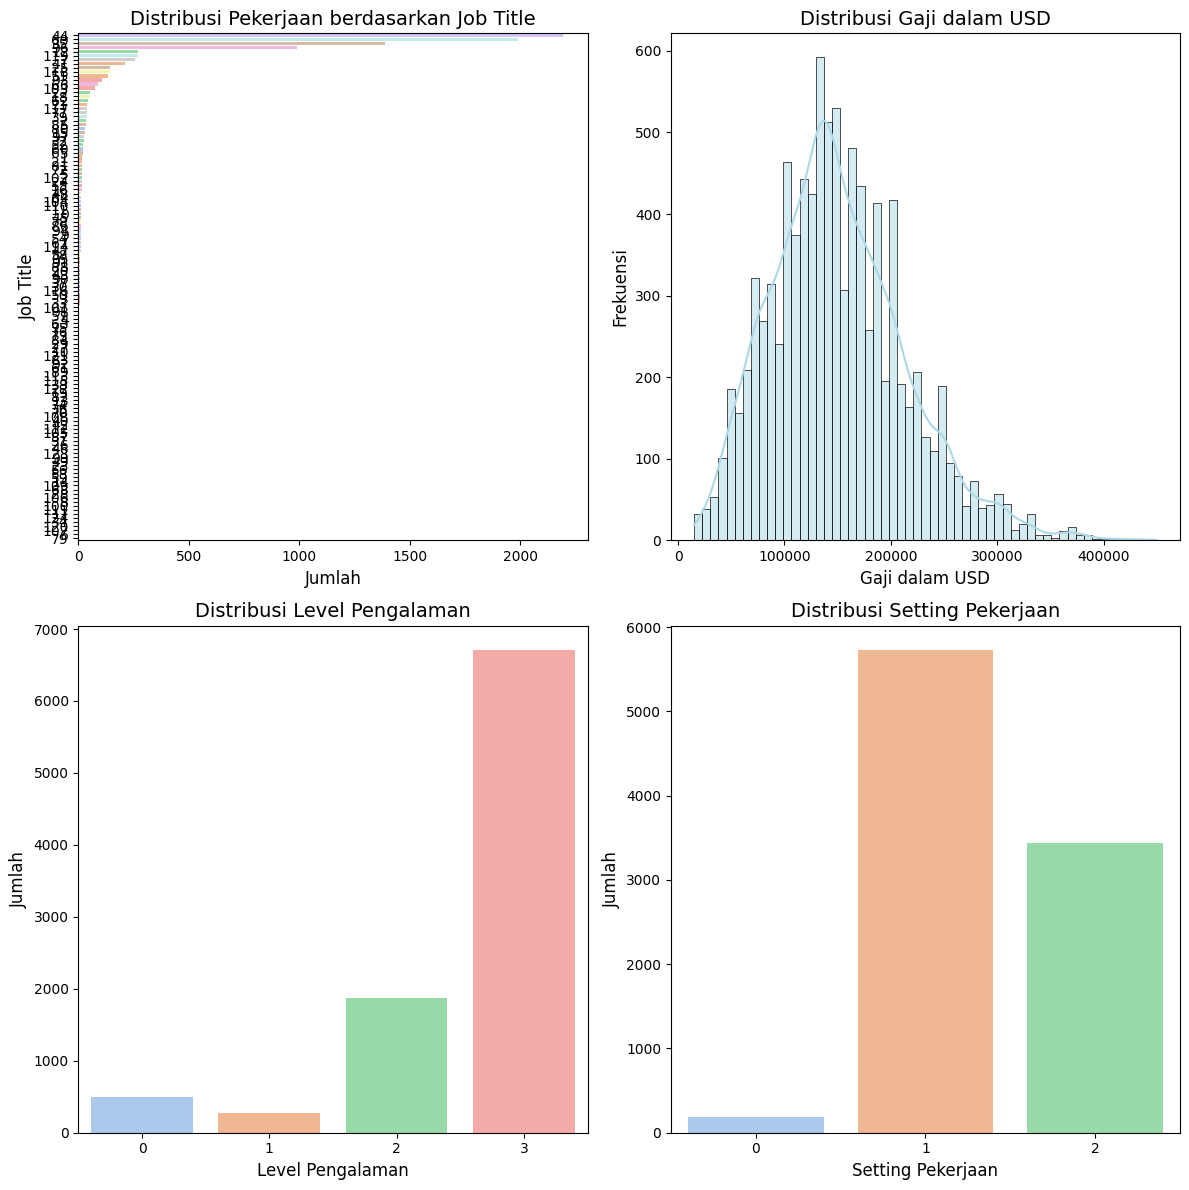

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set palet warna pastel
sns.set_palette("pastel")

# Buat subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Distribusi Pekerjaan berdasarkan Job Title
sns.countplot(y='job_title', data=dt, order=dt['job_title'].value_counts().index, hue='job_title', palette='pastel', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Distribusi Pekerjaan berdasarkan Job Title', fontsize=14)
axs[0, 0].set_xlabel('Jumlah', fontsize=12)
axs[0, 0].set_ylabel('Job Title', fontsize=12)

# Distribusi Gaji dalam USD
sns.histplot(dt['salary_in_usd'], kde=True, color='lightblue', ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Gaji dalam USD', fontsize=14)
axs[0, 1].set_xlabel('Gaji dalam USD', fontsize=12)
axs[0, 1].set_ylabel('Frekuensi', fontsize=12)

# Distribusi Level Pengalaman
sns.countplot(x='experience_level', data=dt, palette='pastel', hue='experience_level', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Distribusi Level Pengalaman', fontsize=14)
axs[1, 0].set_xlabel('Level Pengalaman', fontsize=12)
axs[1, 0].set_ylabel('Jumlah', fontsize=12)

# Distribusi Setting Pekerjaan
sns.countplot(x='work_setting', data=dt, palette='pastel', hue='work_setting', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Distribusi Setting Pekerjaan', fontsize=14)
axs[1, 1].set_xlabel('Setting Pekerjaan', fontsize=12)
axs[1, 1].set_ylabel('Jumlah', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


#Pemilihan data Model Pelatihan

pemisahan data

pemisahan data menjadi data pelatihan dan data uji

In [ ]:
#Pemilihan model dan pelatihan
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = dt.drop(['job_title'], axis=1)
y = dt['job_title']

# Pisahkan data pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Pelatihan Model

Menggunakan Logistic Regression untuk model Classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi penskalaan
scaler = StandardScaler()

# Penskalaan fitur
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi ulang model
model = LogisticRegression(max_iter=1000)

# Latih model dengan data yang telah discaling
model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7151256012827365
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00         6
           2       1.00      0.00      0.00         4
           5       1.00      0.00      0.00         2
           7       1.00      0.00      0.00        53
           9       1.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.68      0.53      0.60        49
          15       1.00      0.00      0.00         8
          16       0.33      0.33      0.33         3
          18       1.00      0.00      0.00        15
          20       0.00      0.00      0.00         2
          21       1.00      0.00      0.00         6
          22       1.00      0.00      0.00        13
          24       1.00      0.00      0.00         4
          25       0.67      0.69      0.68        26
          27       1.00      0.00      0.00         

#Menyimpan data

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = dt.drop(['job_title'], axis=1)
y = dt['job_title']

# Pisahkan data pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sekarang Anda dapat menyimpan data ke dalam format JSON
import json

# Simpan data pelatihan ke dalam file JSON
with open('train_data.json', 'w') as train_file:
    json.dump({'X_train': X_train.to_dict(orient='records'), 'y_train': y_train.to_list()}, train_file)

# Simpan data pengujian ke dalam file JSON
with open('test_data.json', 'w') as test_file:
    json.dump({'X_test': X_test.to_dict(orient='records'), 'y_test': y_test.to_list()}, test_file)

print("Data pelatihan dan pengujian telah disimpan dalam file JSON.")


Data pelatihan dan pengujian telah disimpan dalam file JSON.


#Program
Program untuk aplikasinya jadi data sinence yang dinput itu bisa berupa title maka yang keluar adakan job category bisa juga yang diiinput job categor maka output yang dihasilkan job title

untuk mengakhirinya bisa dengan menginputkan kata "edit" atau "keluar" maka program akan berhenti


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = dt.drop(['job_title'], axis=1)
y = dt['job_title']

# Pisahkan data pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def get_response(user_input):
    user_input_vector = tfidf_vectorizer.transform([user_input.lower()])
    response = model_answer.predict(user_input_vector)
    return response[0]

# Fungsi untuk memprediksi kategori pekerjaan
def get_job_category(job_title):
    job_title_lower = job_title.lower()

    # Mencari kata kunci dalam judul pekerjaan dan mencocokkannya dengan kategori yang tepat
    for index, row in dt_jobs.iterrows():
        if row['job_title'].lower() in job_title_lower:
            return row['job_category']

    for index, row in dt_jobs.iterrows():
        if row['job_category'].lower() in job_title_lower:
            return row['job_title']

    # Jika tidak ada kata kunci yang cocok, gunakan model klasifikasi
    job_title_vector = tfidf_vectorizer.transform([job_title_lower])
    category = model_category.predict(job_title_vector)
    return category[0]

def interactive_session():
    print("Selamat datang! Anda bisa bertanya tentang Data Science atau kategori pekerjaan.")

    while True:
        user_input = input("Anda: ").strip()

        if not user_input:
            continue

        if user_input.lower() in ["exit", "keluar"]:
            print("Terima kasih! Sampai jumpa.")
            break

        if "pekerjaan" in user_input.lower():
            response = get_response(user_input)
            print("Bot:", response)
        else:
            category = get_job_category(user_input)
            print("Kategori Pekerjaan:", category)

# Memulai sesi interaktif
interactive_session()


Selamat datang! Anda bisa bertanya tentang Data Science atau kategori pekerjaan.
Anda: keluar
Terima kasih! Sampai jumpa.


Implementasi Applikasi Web

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = dt.drop(['job_title'], axis=1)
y = dt['job_title']

# Pisahkan data pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk memprediksi kategori pekerjaan
def get_job_category(job_title):
    job_title_lower = job_title.lower()

    # Mencari kata kunci dalam judul pekerjaan dan mencocokkannya dengan kategori yang tepat
    for index, row in dt_jobs.iterrows():
        if row['job_title'].lower() in job_title_lower:
            return row['job_category']

    for index, row in dt_jobs.iterrows():
        if row['job_category'].lower() in job_title_lower:
            return row['job_title']

    # Jika tidak ada kata kunci yang cocok, gunakan model klasifikasi
    job_title_vector = tfidf_vectorizer.transform([job_title_lower])
    category = model_category.predict(job_title_vector)
    return category[0]

def main():
    st.title("Kategori Pekerjaan Prediksi")

    user_input = st.text_input("Masukkan pertanyaan tentang Data Science atau kategori pekerjaan:")

    if st.button("Submit"):
        if "pekerjaan" in user_input.lower():
            response = get_response(user_input)
            st.write("Bot:", response)
        else:
            category = get_job_category(user_input)
            st.write("Kategori Pekerjaan:", category)

if __name__ == "__main__":
    main()


In [1]:
streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

SyntaxError: invalid syntax (<ipython-input-1-03ca03d515b4>, line 1)